# Imports

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [3]:
# Signal width
N = 64

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * N)

# Seed
seed = 42

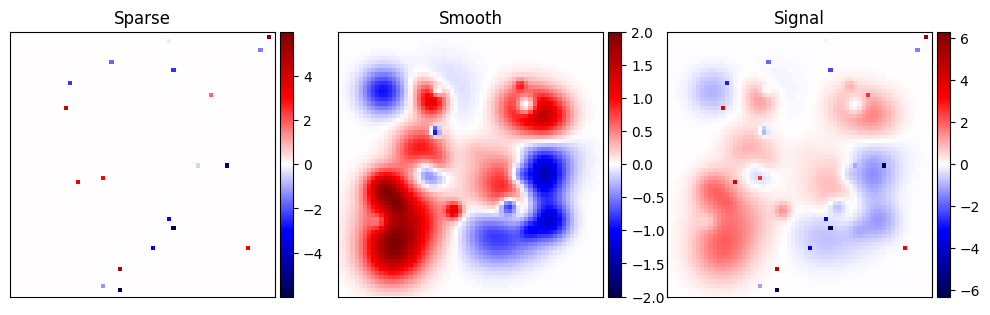

In [4]:
sparse_signal = compute_sparse(N, sparse_range, density, seed)
smooth_signal = compute_smooth(N, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal

plot_signal(sparse_signal, smooth_signal)

# Operator $\phi$

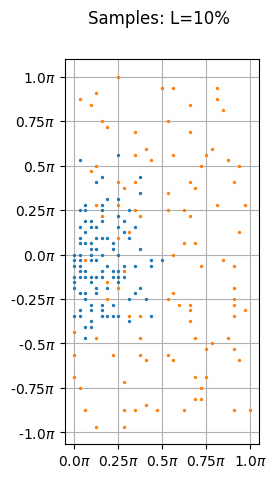

In [5]:
L = 0.1
theta = 0.5
op = NuFFT(N, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50
y = compute_y(y0, psnr)

op.plot_samples()

# Solver

In [6]:
from pyxu.operator import Laplacian
import time

# Loss weights
lambda1 = 1e-2
lambda2 = 5e-2

### Coupled

In [7]:
coupled = True
t0 = time.time()
x1, x2 = solve(y, op, lambda1, lambda2, coupled, Laplacian((op.N,op.N)))
t1 = time.time()

C:\Users\costa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyxu\abc\arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


INFO -- [2023-12-04 14:33:27.439972] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-04 14:33:41.434768] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.000752235994464373
INFO -- [2023-12-04 14:33:54.932558] Iteration 1_000
	iteration: 1000
	N_iter: 1001.0
	RelError[x]: 0.0003045141009506083
INFO -- [2023-12-04 14:34:08.453792] Iteration 1_500
	iteration: 1500
	N_iter: 1501.0
	RelError[x]: 0.0001649762054478895
INFO -- [2023-12-04 14:34:17.224413] Iteration 1_819
	iteration: 1819
	N_iter: 1820.0
	RelError[x]: 9.9971865297094e-05
INFO -- [2023-12-04 14:34:17.224413] Stopping Criterion satisfied -> END


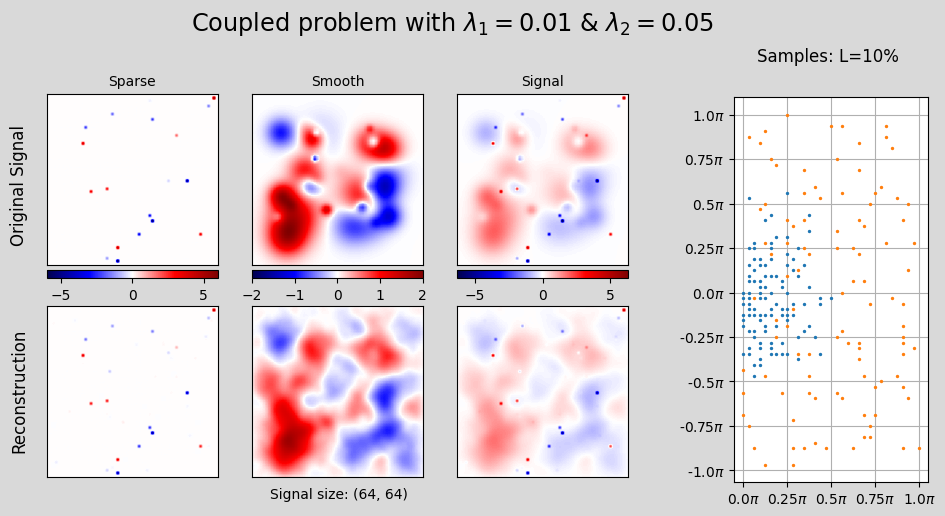

Button(description='SAVE', style=ButtonStyle())

Output()

In [8]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape((N,N)), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr, smooth_rcstr],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

### Decoupled

In [9]:
coupled = False
t0 = time.time()
x1_, x2_ = solve(y, op, lambda1, lambda2, coupled, Laplacian((op.N,op.N)))
t1 = time.time()

1701696861.2976565
check id 0.015621185302734375
Co-Gram Identity
compute l2 op 370.05108070373535


C:\Users\costa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyxu\abc\arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


compute lip 371.0723910331726
compute l1 371.0723910331726
INFO -- [2023-12-04 14:40:32.370047] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-04 14:40:33.399655] Iteration 221
	iteration: 221
	N_iter: 222.0
	RelError[x]: 9.801468437379223e-05
INFO -- [2023-12-04 14:40:33.399655] Stopping Criterion satisfied -> END
solve x1 372.1019992828369
compute x2 373.8663237094879


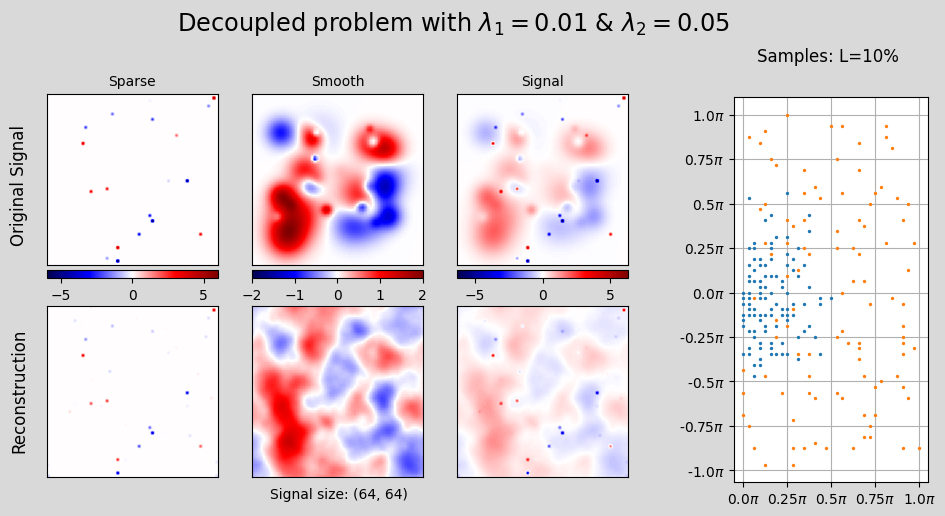

Button(description='SAVE', style=ButtonStyle())

Output()

In [10]:
sparse_rcstr_, smooth_rcstr_, signal_rcstr_ = map(
    lambda x: x.reshape((N,N)), (x1_, x2_, x1_ + x2_)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr_, smooth_rcstr_],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

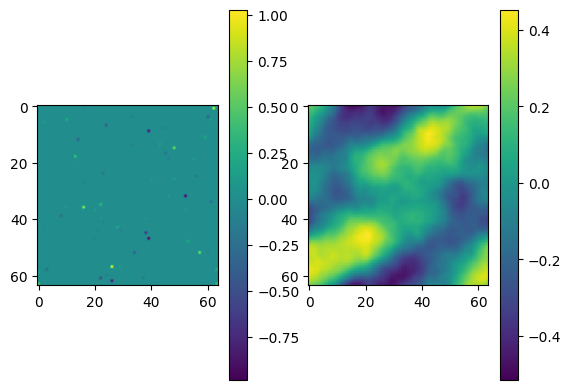

In [11]:
plt.subplot(121)
plt.imshow(sparse_rcstr - sparse_rcstr_)
plt.colorbar()
plt.subplot(122)
plt.imshow(smooth_rcstr - smooth_rcstr_)
plt.colorbar()

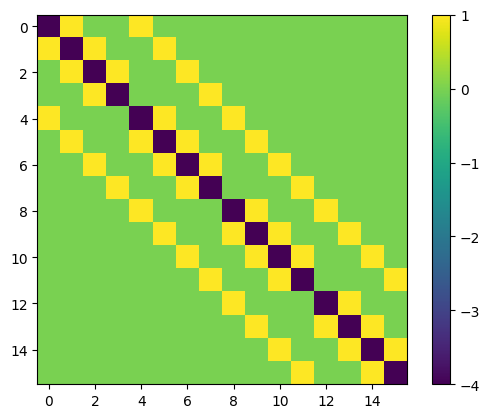

In [14]:
plt.imshow(Laplacian((4,4)).asarray())
plt.colorbar()